In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
import scipy.io
nu = scipy.io.loadmat('nu.mat')['nu']
nu_hat = scipy.io.loadmat('nu_hat.mat')['nu_hat']
z = scipy.io.loadmat('z.mat')['z']

In [132]:
with open(r"vst_transform.pickle", "rb") as input_file:
    fz = pickle.load(input_file)
    

with open(r"raw", "rb") as input_file:
    raw = pickle.load(input_file)
    
with open(r"Rice_noize_11_percent", "rb") as input_file:
    z = pickle.load(input_file)


In [133]:
import argparse
import numpy as np
from skimage import io, util
from sklearn.feature_extraction import image
from sklearn import preprocessing
from ksvd import ApproximateKSVD


img = z[20] #util.img_as_float(io.imread(args.input))
patch_size = (5, 5)
patches = image.extract_patches_2d(img, patch_size)

signals = patches.reshape(patches.shape[0], -1)

mean = np.mean(signals, axis=1)[:, np.newaxis]



signals -= mean
aksvd = ApproximateKSVD(n_components=50)
D = aksvd.fit(signals[:10000])
dictionary = D.components_

gamma = aksvd.transform(signals)




weights  = (gamma!=0).sum(axis=0)/(gamma!=0).sum()

delta =4
weights_matrix = np.diag(weights*delta+1)

D_prime = np.matmul(weights_matrix,dictionary)
reduced = gamma.dot(D_prime) + mean



reduced_img = image.reconstruct_from_patches_2d(
    reduced.reshape(patches.shape), img.shape)



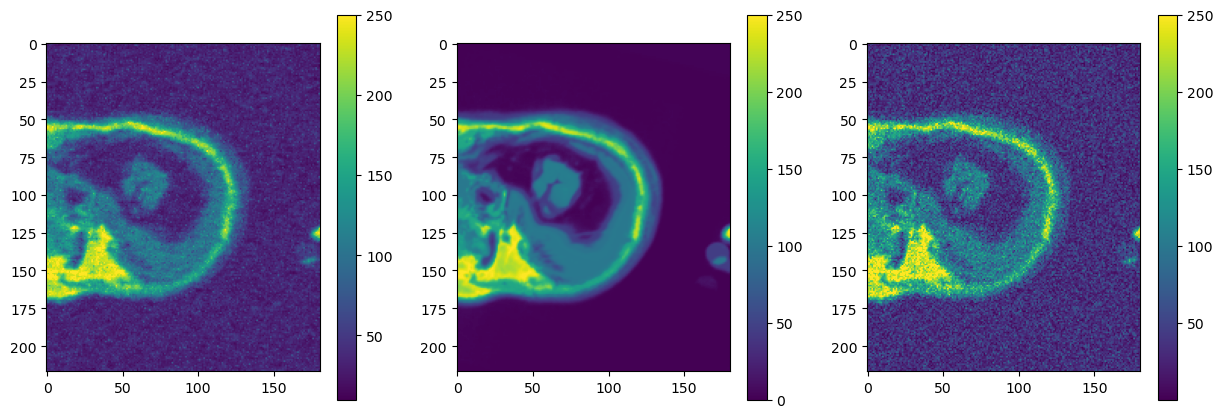

In [135]:
plt.figure(figsize =(15,5))

plt.subplot(131)
plt.imshow(reduced_img,vmax=250)
plt.colorbar()

plt.subplot(132)
plt.imshow(nu[20],vmax=250)
plt.colorbar()


plt.subplot(133)
plt.imshow(z[20],vmax=250)
plt.colorbar()